# Load and prepare the Titanic dataset

Many ideas in this notebook are inspired from https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python.

## Document dependencies
Skip this section. To document the dependencies, execute the following cells after executing all relevant import statements.

In [ ]:
!pip install --user watermark

In [2]:
%load_ext watermark
print()
%watermark -v
print()
%watermark -iv


CPython 3.7.4
IPython 7.8.0

tensorflow_datasets 3.1.0
numpy               1.18.5
pandas              0.25.1
tensorflow          2.1.0



## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the Titanic dataset

In [9]:
ds = tfds.load('titanic', split='train')
print(type(ds))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [10]:
for elem in tfds.as_numpy(ds.take(1)):
    dict_of_lists = {key: [] for key in elem['features']}
    dict_of_lists['survived'] = []
dict_of_lists

{'age': [],
 'boat': [],
 'body': [],
 'cabin': [],
 'embarked': [],
 'fare': [],
 'home.dest': [],
 'name': [],
 'parch': [],
 'pclass': [],
 'sex': [],
 'sibsp': [],
 'ticket': [],
 'survived': []}

In [11]:
for elem in tfds.as_numpy(ds):
    dict_of_lists['survived'].append(elem['survived'])
    for key in elem['features']:
        dict_of_lists[key].append(elem['features'][key])
print(dict_of_lists)

{'age': [30.0, 37.0, 28.0, 18.0, -1.0, 56.0, 40.0, 45.0, 32.0, 30.0, 20.0, 21.0, 21.0, 36.0, 25.0, -1.0, -1.0, 54.0, 46.0, -1.0, 62.0, 48.0, -1.0, 33.0, 18.0, 1.0, 20.0, 11.0, 36.0, 18.5, 23.0, 20.0, 30.0, 38.0, -1.0, 30.0, 71.0, -1.0, 26.0, 14.0, 27.0, 25.0, 18.0, 35.0, -1.0, 40.0, -1.0, 18.0, 46.0, 48.0, 27.0, 20.0, 24.0, 26.0, 51.0, 35.0, 52.0, -1.0, 26.0, -1.0, 10.0, 17.0, 27.0, 52.0, 70.0, 31.0, -1.0, 25.0, 32.0, -1.0, 17.0, 28.0, 32.0, -1.0, 3.0, -1.0, -1.0, -1.0, 51.0, 0.75, 63.0, 2.0, 16.0, -1.0, 20.0, 22.0, 22.0, 31.0, 58.0, 26.5, -1.0, 42.0, 29.0, 25.0, 20.0, -1.0, 9.0, 27.0, 58.0, 5.0, 49.0, -1.0, 27.0, 18.0, -1.0, 45.0, 39.0, 54.0, 18.0, 18.0, -1.0, 33.0, 24.0, 19.0, 45.0, 21.0, 22.0, 19.0, -1.0, 18.0, 2.0, 36.0, 24.0, -1.0, 2.0, -1.0, 38.0, 61.0, -1.0, 74.0, -1.0, -1.0, 23.0, 17.0, 25.0, -1.0, 24.0, 30.0, 6.0, 20.0, 29.0, 1.0, 0.6667, -1.0, 18.0, 24.0, 21.0, 21.0, 27.0, 61.0, -1.0, 35.0, 24.0, 28.5, 26.0, 54.0, 22.0, 22.0, 19.0, 41.0, 17.0, 27.0, 19.0, 27.0, 2.0, 9.0, 33.0

In [12]:
df_raw = pd.DataFrame(data=dict_of_lists)
df_raw.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,ticket,survived
0,30.0,b'Unknown',-1,b'Unknown',2,13.0000,"b'Sarnia, ON'","b'McCrie, Mr. James Matthew'",0,1,0,0,b'233478',0
1,37.0,b'Unknown',98,b'Unknown',2,7.9250,"b'Ruotsinphytaa, Finland New York, NY'","b'Gustafsson, Mr. Anders Vilhelm'",0,2,0,2,b'3101276',0
2,28.0,b'9',-1,b'Unknown',2,13.0000,b'Spain',"b'Reynaldo, Ms. Encarnacion'",0,1,1,0,b'230434',1
3,18.0,b'Unknown',-1,b'Unknown',2,73.5000,"b'Lyndhurst, England'","b'Davies, Mr. Charles Henry'",0,1,0,0,b'S.O.C. 14879',0
4,-1.0,b'Unknown',-1,b'Unknown',0,7.8958,b'Unknown',"b'Gheorgheff, Mr. Stanio'",0,2,0,0,b'349254',0


# Pre-processing

## 1: Drop columns that will not be used further
The column 'cabin' has mostly unknown values. 'boat' is known almost exclusively for survivors. The others don't hold useful information.

In [13]:
df_drop = df_raw.drop(columns=['boat', 'body', 'cabin', 'home.dest', 'name', 'ticket'])
df_drop.head()

,age,embarked,fare,parch,pclass,sex,sibsp,survived
0,30.0,2,13.0000,0,1,0,0,0
1,37.0,2,7.9250,0,2,0,2,0
2,28.0,2,13.0000,0,1,1,0,1
3,18.0,2,73.5000,0,1,0,0,0
4,-1.0,0,7.8958,0,2,0,0,0


## 2: Clean the remaining features.

### embarked

In [14]:
df_drop.pivot(columns='embarked', values='survived').count()

embarked
0    270
1    123
2    914
3      2
dtype: int64

embarked category 3 corresponds to missing values, of which there are two. They can be replaced with the most frequent port of embarkation (2, corresponding to Southampton)

In [15]:
df_embarked = df_drop.copy()
df_embarked['embarked'] = df_drop.embarked.apply(lambda x: min(2,x))
df_embarked.pivot(columns='embarked', values='survived').count()

embarked
0    270
1    123
2    916
dtype: int64

Then, `embarked` is finally one-hot-encoded. It is not necessary to keep all three embarkation ports, because they are linearly dependent with the "mean column" or column of 1s that is equivalent to adding a bias term in the linear model, which is done in net_fn.

In [16]:
df_embarked_1hot = pd.get_dummies(df_embarked, columns=['embarked']).drop(columns=['embarked_2'])
df_embarked_1hot.head()

,age,fare,parch,pclass,sex,sibsp,survived,embarked_0,embarked_1
0,30.0,13.0000,0,1,0,0,0,0,0
1,37.0,7.9250,0,2,0,2,0,0,0
2,28.0,13.0000,0,1,1,0,1,0,0
3,18.0,73.5000,0,1,0,0,0,0,0
4,-1.0,7.8958,0,2,0,0,0,1,0


### fare

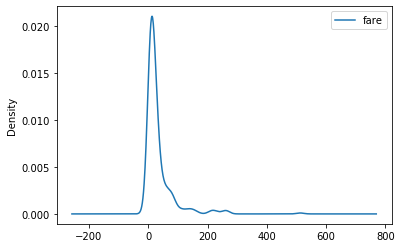

In [17]:
df_embarked_1hot.plot(y='fare', kind='density')#, bins=[-1]+list(range(0,550,50)))

The 'fare' feature is good to go.

## parch and sibsp
These columns are combined into a binary variable indicating whether the passenger travelled alone:

In [18]:
df_parch = df_embarked_1hot.copy()
df_parch['travel_alone']=np.where((df_parch["sibsp"]+df_parch["parch"])>0, 0, 1)
df_parch.head()

,age,fare,parch,pclass,sex,sibsp,survived,embarked_0,embarked_1,travel_alone
0,30.0,13.0000,0,1,0,0,0,0,0,1
1,37.0,7.9250,0,2,0,2,0,0,0,0
2,28.0,13.0000,0,1,1,0,1,0,0,1
3,18.0,73.5000,0,1,0,0,0,0,0,1
4,-1.0,7.8958,0,2,0,0,0,1,0,1


In [19]:
df_parch = df_parch.drop(columns=['sibsp', 'parch'])
df_parch.head()

,age,fare,pclass,sex,survived,embarked_0,embarked_1,travel_alone
0,30.0,13.0000,1,0,0,0,0,1
1,37.0,7.9250,2,0,0,0,0,0
2,28.0,13.0000,1,1,1,0,0,1
3,18.0,73.5000,1,0,0,0,0,1
4,-1.0,7.8958,2,0,0,1,0,1


### Passenger class

In [20]:
df_parch.pivot(columns='pclass', values='survived').count()

pclass
0    323
1    277
2    709
dtype: int64

pclass is one-hot encoded. It is not necessary to keep all three passenger classes, because they are linearly dependent with the "mean column" or column of 1s that is equivalent to adding a bias term in the linear model, which is done in net_fn.

In [42]:
df_pclass = pd.get_dummies(df_parch, columns=['pclass']).drop(columns=['pclass_2'])
df_pclass.head()

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1
0,30.0,13.0000,0,0,0,0,1,0,1
1,37.0,7.9250,0,0,0,0,0,0,0
2,28.0,13.0000,1,1,0,0,1,0,1
3,18.0,73.5000,0,0,0,0,1,0,1
4,-1.0,7.8958,0,0,1,0,1,0,0


### sex

In [43]:
df_pclass.pivot(columns='sex', values='survived').count()

sex
0    843
1    466
dtype: int64

The `sex` feature is good to go.

### age

In [90]:
proportion_missing = np.sum(df_pclass['age'] < 0) / df_pclass.shape[0]
proportion_missing

0.20091673032849502

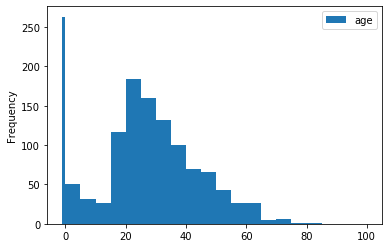

In [57]:
df_pclass.plot(y='age', kind='hist', bins=[-1]+list(range(0,101,5)))

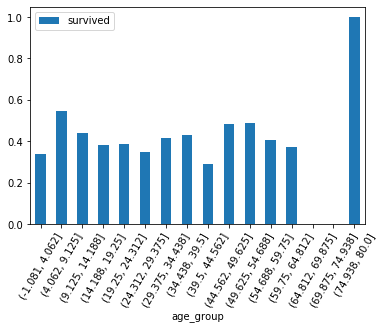

In [94]:
df_age = df_pclass.copy()
df_age['age_group'] = pd.cut(df_age['age'], 16)
df_age.groupby(by='age_group').mean().plot(y='survived', rot=60, kind='bar')

20.1% of `age` values are missing.We impute them with the column mean.
We also create a new feature `IsMinor` for children under the age of 16, following MNassri (cf. link at the top of the notebook), even though we do not find a surprising difference in survival rates between minors and adults.

In [95]:
df_age['age_missing'] = df_age['age'] < 0
df_age.head(10)

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,age_group,age_missing
0,30.0,13.000000,0,0,0,0,1,0,1,"(29.375, 34.438]",False
1,37.0,7.925000,0,0,0,0,0,0,0,"(34.438, 39.5]",False
2,28.0,13.000000,1,1,0,0,1,0,1,"(24.312, 29.375]",False
3,18.0,73.500000,0,0,0,0,1,0,1,"(14.188, 19.25]",False
4,-1.0,7.895800,0,0,1,0,1,0,0,"(-1.081, 4.062]",True
5,56.0,26.549999,0,0,0,0,1,1,0,"(54.688, 59.75]",False
6,40.0,16.000000,0,0,0,0,1,0,1,"(39.5, 44.562]",False
7,45.0,14.108300,1,1,0,0,0,0,0,"(44.562, 49.625]",False
8,32.0,15.500000,1,0,0,1,0,0,0,"(29.375, 34.438]",False
9,30.0,93.500000,1,1,0,0,1,1,0,"(29.375, 34.438]",False


In [96]:
age_mean = df_age['age'][1 - df_age['age_missing']].mean()
print('median:', df_age['age'][1 - df_age['age_missing']].median(),'mean:', age_mean)

median: 37.0 mean: 35.593582887700535


In [97]:
df_age.loc[df_age['age_missing'], 'age'] = age_mean
df_age.head(10)

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,age_group,age_missing
0,30.000000,13.000000,0,0,0,0,1,0,1,"(29.375, 34.438]",False
1,37.000000,7.925000,0,0,0,0,0,0,0,"(34.438, 39.5]",False
2,28.000000,13.000000,1,1,0,0,1,0,1,"(24.312, 29.375]",False
3,18.000000,73.500000,0,0,0,0,1,0,1,"(14.188, 19.25]",False
4,35.593583,7.895800,0,0,1,0,1,0,0,"(-1.081, 4.062]",True
5,56.000000,26.549999,0,0,0,0,1,1,0,"(54.688, 59.75]",False
6,40.000000,16.000000,0,0,0,0,1,0,1,"(39.5, 44.562]",False
7,45.000000,14.108300,1,1,0,0,0,0,0,"(44.562, 49.625]",False
8,32.000000,15.500000,1,0,0,1,0,0,0,"(29.375, 34.438]",False
9,30.000000,93.500000,1,1,0,0,1,1,0,"(29.375, 34.438]",False


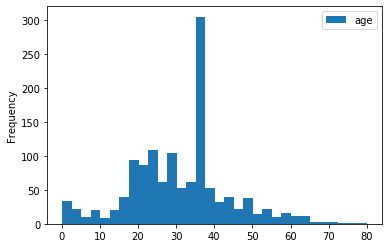

In [98]:
df_age.plot(y='age', kind='hist', bins = 32)

In [99]:
df_age['is_minor'] = (df_age['age'] < 17).astype(int)
df_age.head(55)

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,age_group,age_missing,is_minor
0,30.000000,13.000000,0,0,0,0,1,0,1,"(29.375, 34.438]",False,0
1,37.000000,7.925000,0,0,0,0,0,0,0,"(34.438, 39.5]",False,0
2,28.000000,13.000000,1,1,0,0,1,0,1,"(24.312, 29.375]",False,0
3,18.000000,73.500000,0,0,0,0,1,0,1,"(14.188, 19.25]",False,0
4,35.593583,7.895800,0,0,1,0,1,0,0,"(-1.081, 4.062]",True,0
5,56.000000,26.549999,0,0,0,0,1,1,0,"(54.688, 59.75]",False,0
6,40.000000,16.000000,0,0,0,0,1,0,1,"(39.5, 44.562]",False,0
7,45.000000,14.108300,1,1,0,0,0,0,0,"(44.562, 49.625]",False,0
8,32.000000,15.500000,1,0,0,1,0,0,0,"(29.375, 34.438]",False,0
9,30.000000,93.500000,1,1,0,0,1,1,0,"(29.375, 34.438]",False,0


In [100]:
df_age.loc[df_age['age_missing'], 'is_minor'] = proportion_missing
df_age.head(55)

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,age_group,age_missing,is_minor
0,30.000000,13.000000,0,0,0,0,1,0,1,"(29.375, 34.438]",False,0.000000
1,37.000000,7.925000,0,0,0,0,0,0,0,"(34.438, 39.5]",False,0.000000
2,28.000000,13.000000,1,1,0,0,1,0,1,"(24.312, 29.375]",False,0.000000
3,18.000000,73.500000,0,0,0,0,1,0,1,"(14.188, 19.25]",False,0.000000
4,35.593583,7.895800,0,0,1,0,1,0,0,"(-1.081, 4.062]",True,0.200917
5,56.000000,26.549999,0,0,0,0,1,1,0,"(54.688, 59.75]",False,0.000000
6,40.000000,16.000000,0,0,0,0,1,0,1,"(39.5, 44.562]",False,0.000000
7,45.000000,14.108300,1,1,0,0,0,0,0,"(44.562, 49.625]",False,0.000000
8,32.000000,15.500000,1,0,0,1,0,0,0,"(29.375, 34.438]",False,0.000000
9,30.000000,93.500000,1,1,0,0,1,1,0,"(29.375, 34.438]",False,0.000000


In [101]:
df = df_age.drop(columns=['age_missing', 'age_group'])
df.head()

,age,fare,sex,survived,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,is_minor
0,30.000000,13.0000,0,0,0,0,1,0,1,0.000000
1,37.000000,7.9250,0,0,0,0,0,0,0,0.000000
2,28.000000,13.0000,1,1,0,0,1,0,1,0.000000
3,18.000000,73.5000,0,0,0,0,1,0,1,0.000000
4,35.593583,7.8958,0,0,1,0,1,0,0,0.200917


## Saving the result

In [107]:
df.to_csv("../data/non-private/Titanic_preprocessed.csv", index=False)
df_pclass.to_csv("../data/non-private/Titanic_preprocessed_except_age.csv", index=False)

## 3. Create X, y, and age, by splitting off the `survived` column and copying `age`

In [108]:
df = pd.read_csv('../data/non-private/Titanic_preprocessed.csv')
df_pclass = pd.read_csv('../data/non-private/Titanic_preprocessed_except_age.csv')

In [109]:
na = np.sum(df_pclass['age'] < 0) / len(df)
print("unknown age:", na)
lower_21 = np.sum(df_pclass['age'] < 21) / len(df)
print("0-20 years:", lower_21 - na)
lower_36 = np.sum(df_pclass['age'] < 36) / len(df)
print("21-35 years:", lower_36 - lower_21)
print("36+ years:", np.sum(df_pclass['age'] >=36) / len(df))
print("na values:", 1 - df_pclass['age'].count() / len(df))

unknown age: 0.20091673032849502
0-20 years: 0.19022154316271964
21-35 years: 0.36287242169595113
36+ years: 0.24598930481283424
na values: 0.0


In [111]:
age_original = df_pclass.loc[:, ['age']].copy()
y = df.loc[:,['survived']].copy()
X = df.drop(columns=['survived'])

In [112]:
age_original.head()

,age
0,30.0
1,37.0
2,28.0
3,18.0
4,-1.0


In [113]:
y.head()

,survived
0,0
1,0
2,1
3,0
4,0


In [114]:
X.head()

,age,fare,sex,embarked_0,embarked_1,travel_alone,pclass_0,pclass_1,is_minor
0,30.000000,13.0000,0,0,0,1,0,1,0.000000
1,37.000000,7.9250,0,0,0,0,0,0,0.000000
2,28.000000,13.0000,1,0,0,1,0,1,0.000000
3,18.000000,73.5000,0,0,0,1,0,1,0.000000
4,35.593583,7.8958,0,1,0,1,0,0,0.200917


## Save the feature matrix $\mathbf{X}$, the target vector $\mathbf{y}$, and the age (for reference)

In [116]:
import os
save_dir = '../data/non-private/predict_titanic_survived'
if not os.path.isdir(save_dir):
    os.mkdir(save_dir)
X.to_csv(os.path.join(save_dir, 'X.csv'), index=False)
y.to_csv(os.path.join(save_dir, 'y.csv'), index=False)
age_original.to_csv(os.path.join(save_dir, 'age.csv'), index=False)

In [43]:
y.shape

(1309, 1)

In [44]:
y2 = np.loadtxt(os.path.join(save_dir, 'y.csv'), skiprows=1, delimiter=',')
y2.shape

(1309,)

In [51]:
X['fare'].min()

-1.0